In [ ]:
!sudo apt-get install -y fonts-NanumBarunGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-NanumBarunGothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#머신러닝에 필요한 기본 패키지 설치
!pip install geopandas
!pip install scipy
!pip install matplotlib
!pip install ipython
!pip install scikit-learn
!pip install pillow
!pip install wrapt
!pip install tensorflow==2.0.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 19.6 MB/s 
     |████████████████████████████████| 6.3 MB 48.7 MB/s 
     |████████████████████████████████| 16.7 MB 381 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 23.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/cola

In [ ]:
#머신러닝 데이터 적재
from os import listdir
from os.path import isfile, join
import pandas as pd
import geopandas as gpd
import time
import json
import folium
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
import fiona
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import Point, Polygon, LineString
from shapely import wkt

from tqdm import trange, tqdm, tqdm_notebook, tnrange

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer, MinMaxScaler
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from functools import partial

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings




# **[Train Dataset]**

# 학습용 데이터 불러오기


*   250격자 고양시(0값 제거)
*   500격자 고양시(0값 제거)






In [ ]:

df = pd.read_csv('/content/500격자 고양시(0값 제거).csv',  encoding='UTF-8')
df.head(10)

len(df)

908

In [ ]:
df= df.fillna(0)

결측치/결측값(missing value) 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_

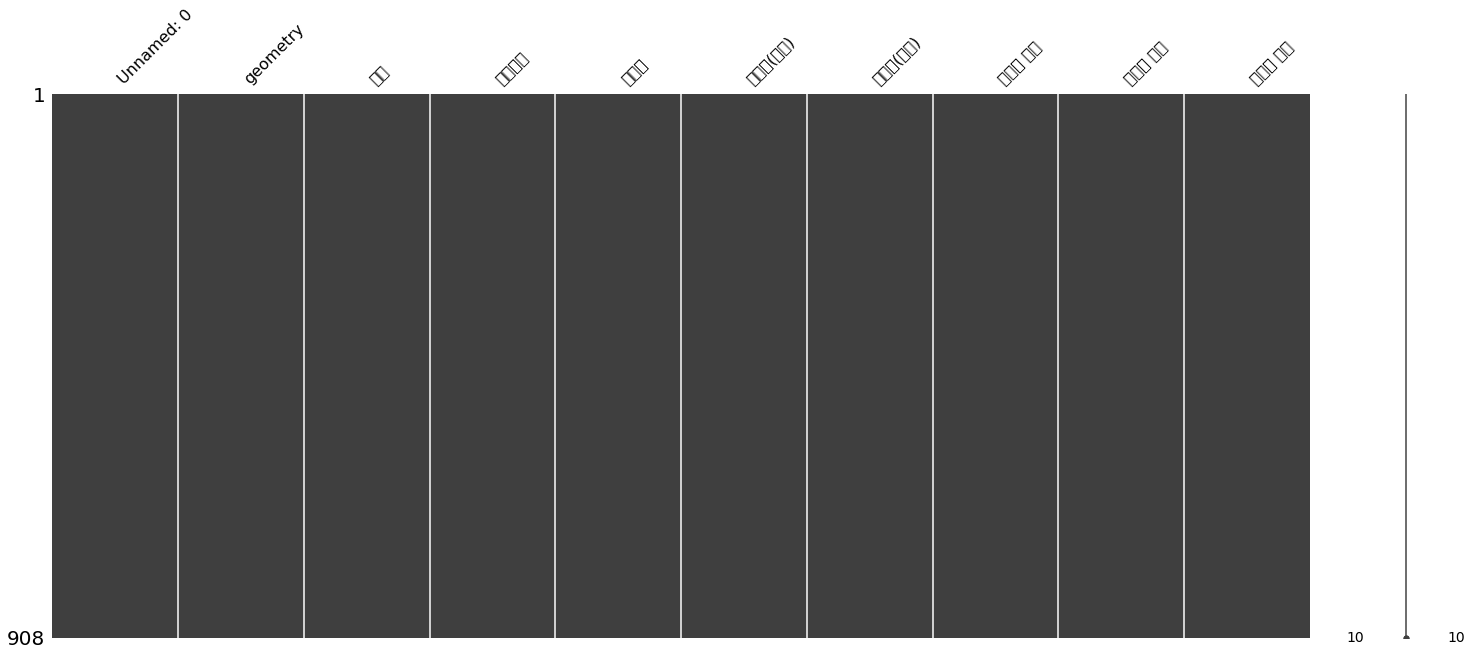

In [ ]:
import missingno as msno
msno.matrix(df)

#상관관계 확인


*   각 변수들끼리의 상관관계를 확인하고 시각화 해서 종속변수와 상관관계가 높은 변수들만 선택




In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")


In [ ]:
X = df.iloc[:, 3:-2]
y = df.iloc[:, -1]

In [ ]:
# matplotlib 한글 지원 폰트 설정
plt.rc('font',family = 'NanumBarunGothic')

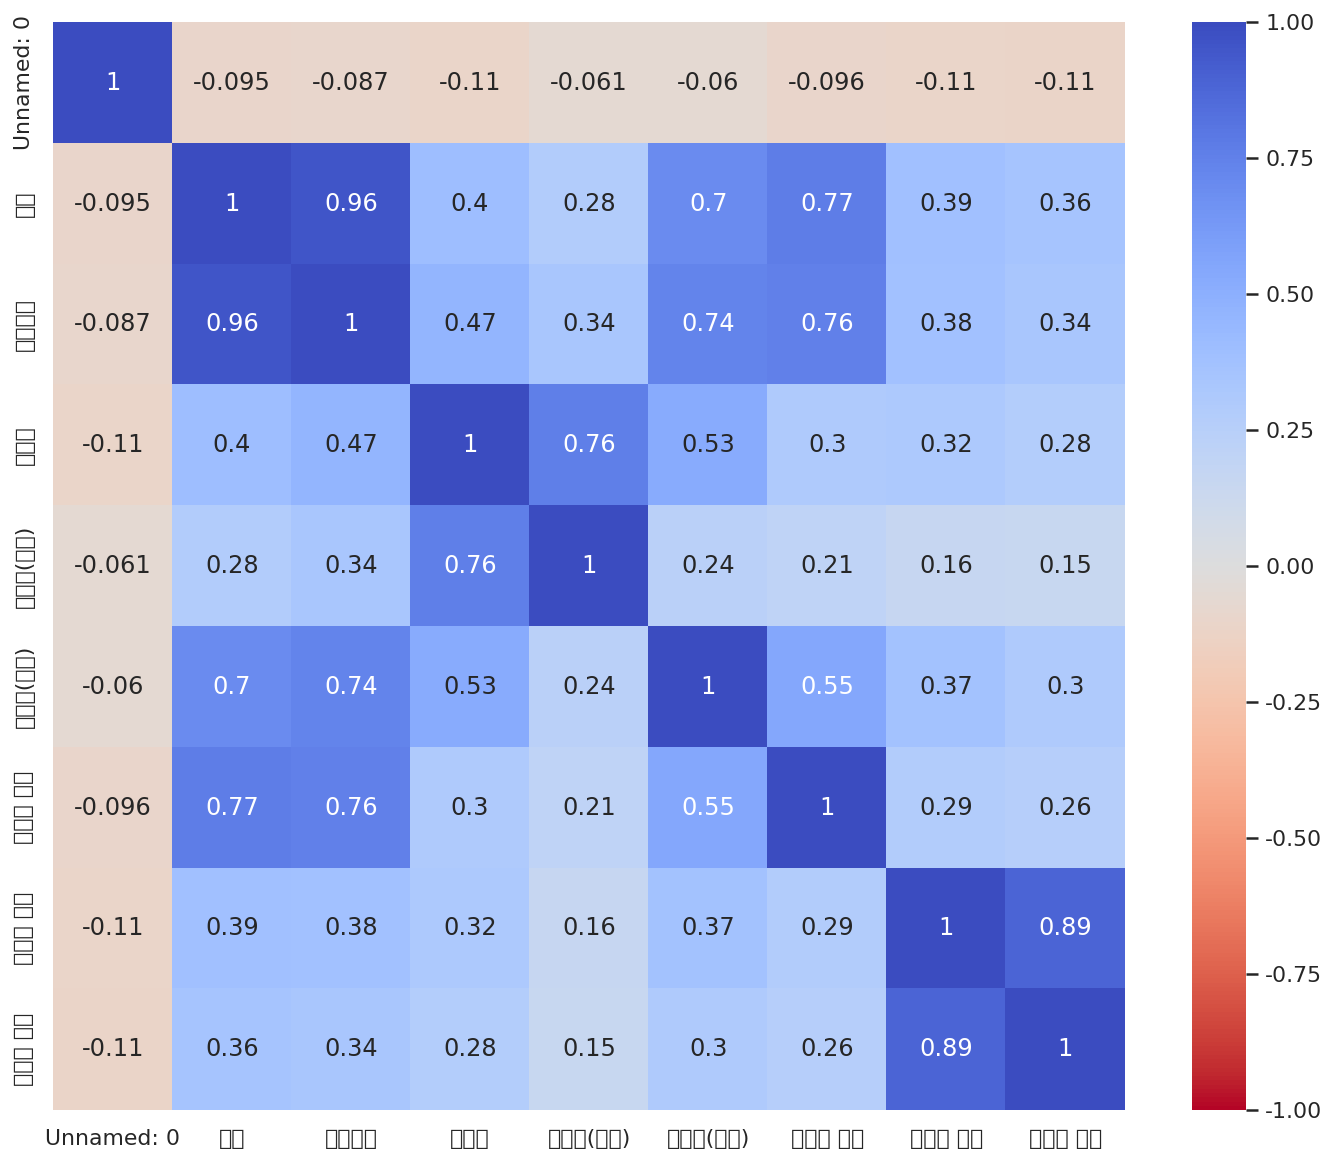

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm_r")

plt.show()

#Target = 정류장유무 지정



In [ ]:
target = df['정류장 유무']
df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 개수,정류장 유무
0,0,MULTIPOLYGON (((126.9557200734875 37.669764111...,0.0,0.0,3.0,2.0,0.0,0.000000,0.0,0.0
1,1,MULTIPOLYGON (((126.79740611435997 37.62386095...,66.0,17.0,4.0,1.0,0.0,1.094206,0.0,0.0
2,2,MULTIPOLYGON (((126.85367307377835 37.66924905...,29.0,14.0,17.0,9.0,0.0,0.996372,0.0,0.0
3,3,MULTIPOLYGON (((126.71728345831605 37.69996888...,39.0,8.0,104.0,11.0,0.0,1.415672,0.0,0.0
4,4,MULTIPOLYGON (((126.81419616079585 37.64649296...,0.0,0.0,6.0,1.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
903,1180,MULTIPOLYGON (((126.87710251157806 37.57924172...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
904,1182,MULTIPOLYGON (((126.89909963899531 37.66047595...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
905,1185,MULTIPOLYGON (((126.85883793268458 37.72786316...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0
906,1201,MULTIPOLYGON (((126.80210163388575 37.72754092...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0


Target 값 시각화

ValueError: ignored

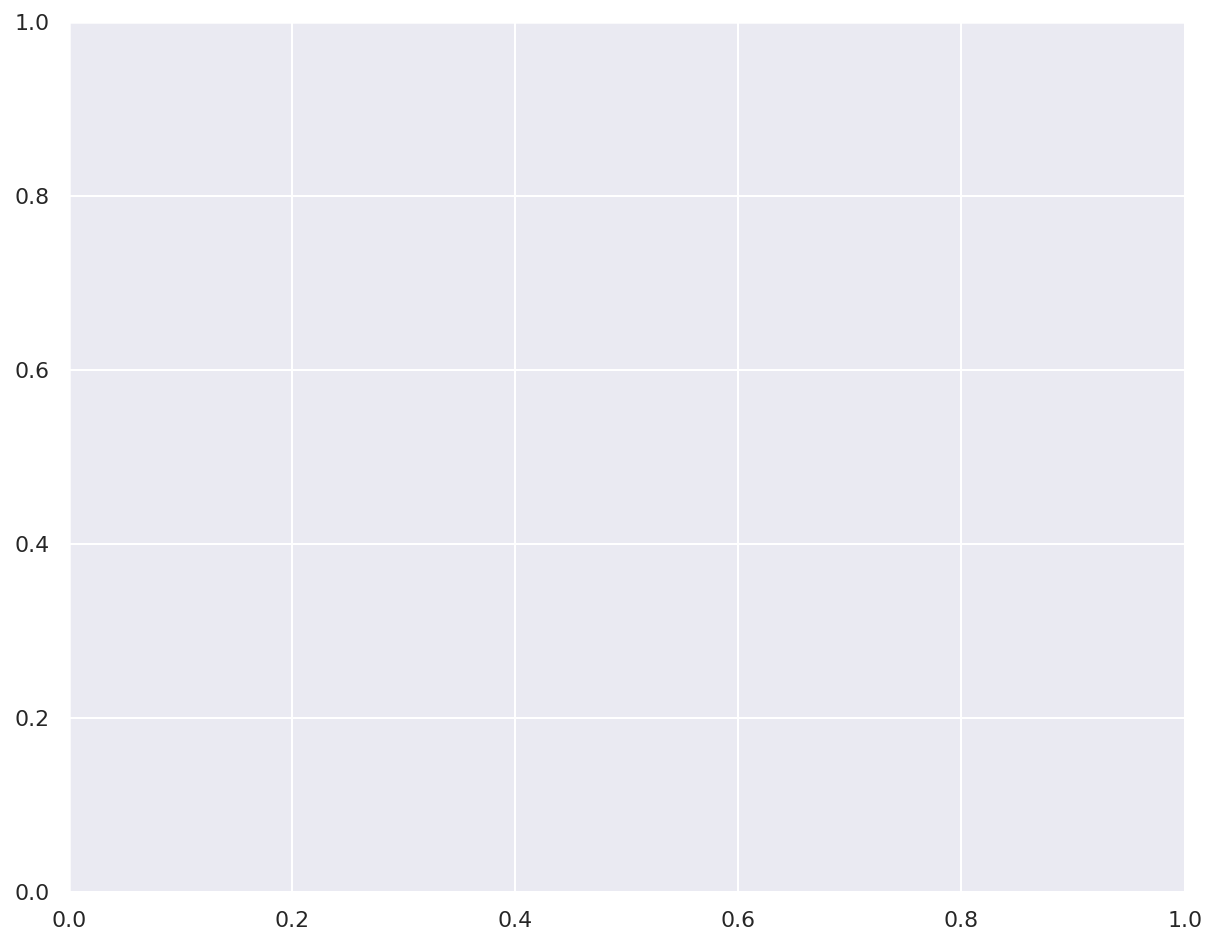

In [ ]:
plt.bar(target.unique(), target.value_counts())
plt.xticks([0, 1])
plt.show()
print(target.value_counts())

In [ ]:
df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 개수,정류장 유무
0,0,MULTIPOLYGON (((126.9557200734875 37.669764111...,0.0,0.0,3.0,2.0,0.0,0.000000,0.0,0.0
1,1,MULTIPOLYGON (((126.79740611435997 37.62386095...,66.0,17.0,4.0,1.0,0.0,1.094206,0.0,0.0
2,2,MULTIPOLYGON (((126.85367307377835 37.66924905...,29.0,14.0,17.0,9.0,0.0,0.996372,0.0,0.0
3,3,MULTIPOLYGON (((126.71728345831605 37.69996888...,39.0,8.0,104.0,11.0,0.0,1.415672,0.0,0.0
4,4,MULTIPOLYGON (((126.81419616079585 37.64649296...,0.0,0.0,6.0,1.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
903,1180,MULTIPOLYGON (((126.87710251157806 37.57924172...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
904,1182,MULTIPOLYGON (((126.89909963899531 37.66047595...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
905,1185,MULTIPOLYGON (((126.85883793268458 37.72786316...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0
906,1201,MULTIPOLYGON (((126.80210163388575 37.72754092...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0


필요없는 컬럼값 제거

In [ ]:
df = df.drop(['geometry'], axis=1)
df = df.drop([df.columns[0]], axis=1)
df = df.drop(['정류장 유무'], axis =1)
df = df.drop(['정류장 개수'], axis =1)


df.head(5)

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.0,0.0,3.0,2.0,0.0,0.000000
1,66.0,17.0,4.0,1.0,0.0,1.094206
2,29.0,14.0,17.0,9.0,0.0,0.996372
3,39.0,8.0,104.0,11.0,0.0,1.415672
4,0.0,0.0,6.0,1.0,0.0,0.000000


# 분류모형의 Feature Importance


정규화(Feature Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])

In [ ]:
df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.000000,0.000000,0.005894,0.004124,0.0,0.000000
1,0.005780,0.008221,0.007859,0.002062,0.0,0.000701
2,0.002540,0.006770,0.033399,0.018557,0.0,0.000638
3,0.003415,0.003868,0.204322,0.022680,0.0,0.000907
4,0.000000,0.000000,0.011788,0.002062,0.0,0.000000
...,...,...,...,...,...,...
903,0.000000,0.000000,0.001965,0.000000,0.0,0.000000
904,0.000000,0.000000,0.001965,0.000000,0.0,0.000000
905,0.000000,0.000000,0.003929,0.000000,0.0,0.000000
906,0.000000,0.000000,0.003929,0.000000,0.0,0.000000


In [ ]:
from sklearn.model_selection import train_test_split

data_train = df
target_train = target


In [ ]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, random_state = 22)
rf_model.fit(data_train, target_train)


features = pd.DataFrame(data=np.c_[X.columns.values,rf_model.feature_importances_],
                        columns=["feature", "importance"])



features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score




# **[Test Dataset]**

# 테스트용 데이터 불러오기


*   250격자 세종시(0값 제거)
*   500격자 세종시(0값 제거)


In [ ]:
#데이터 불러오기
s_df = pd.read_csv('/content/500격자 세종시.csv',  encoding='UTF-8')
s_df.head(10)
len(s_df)

2023

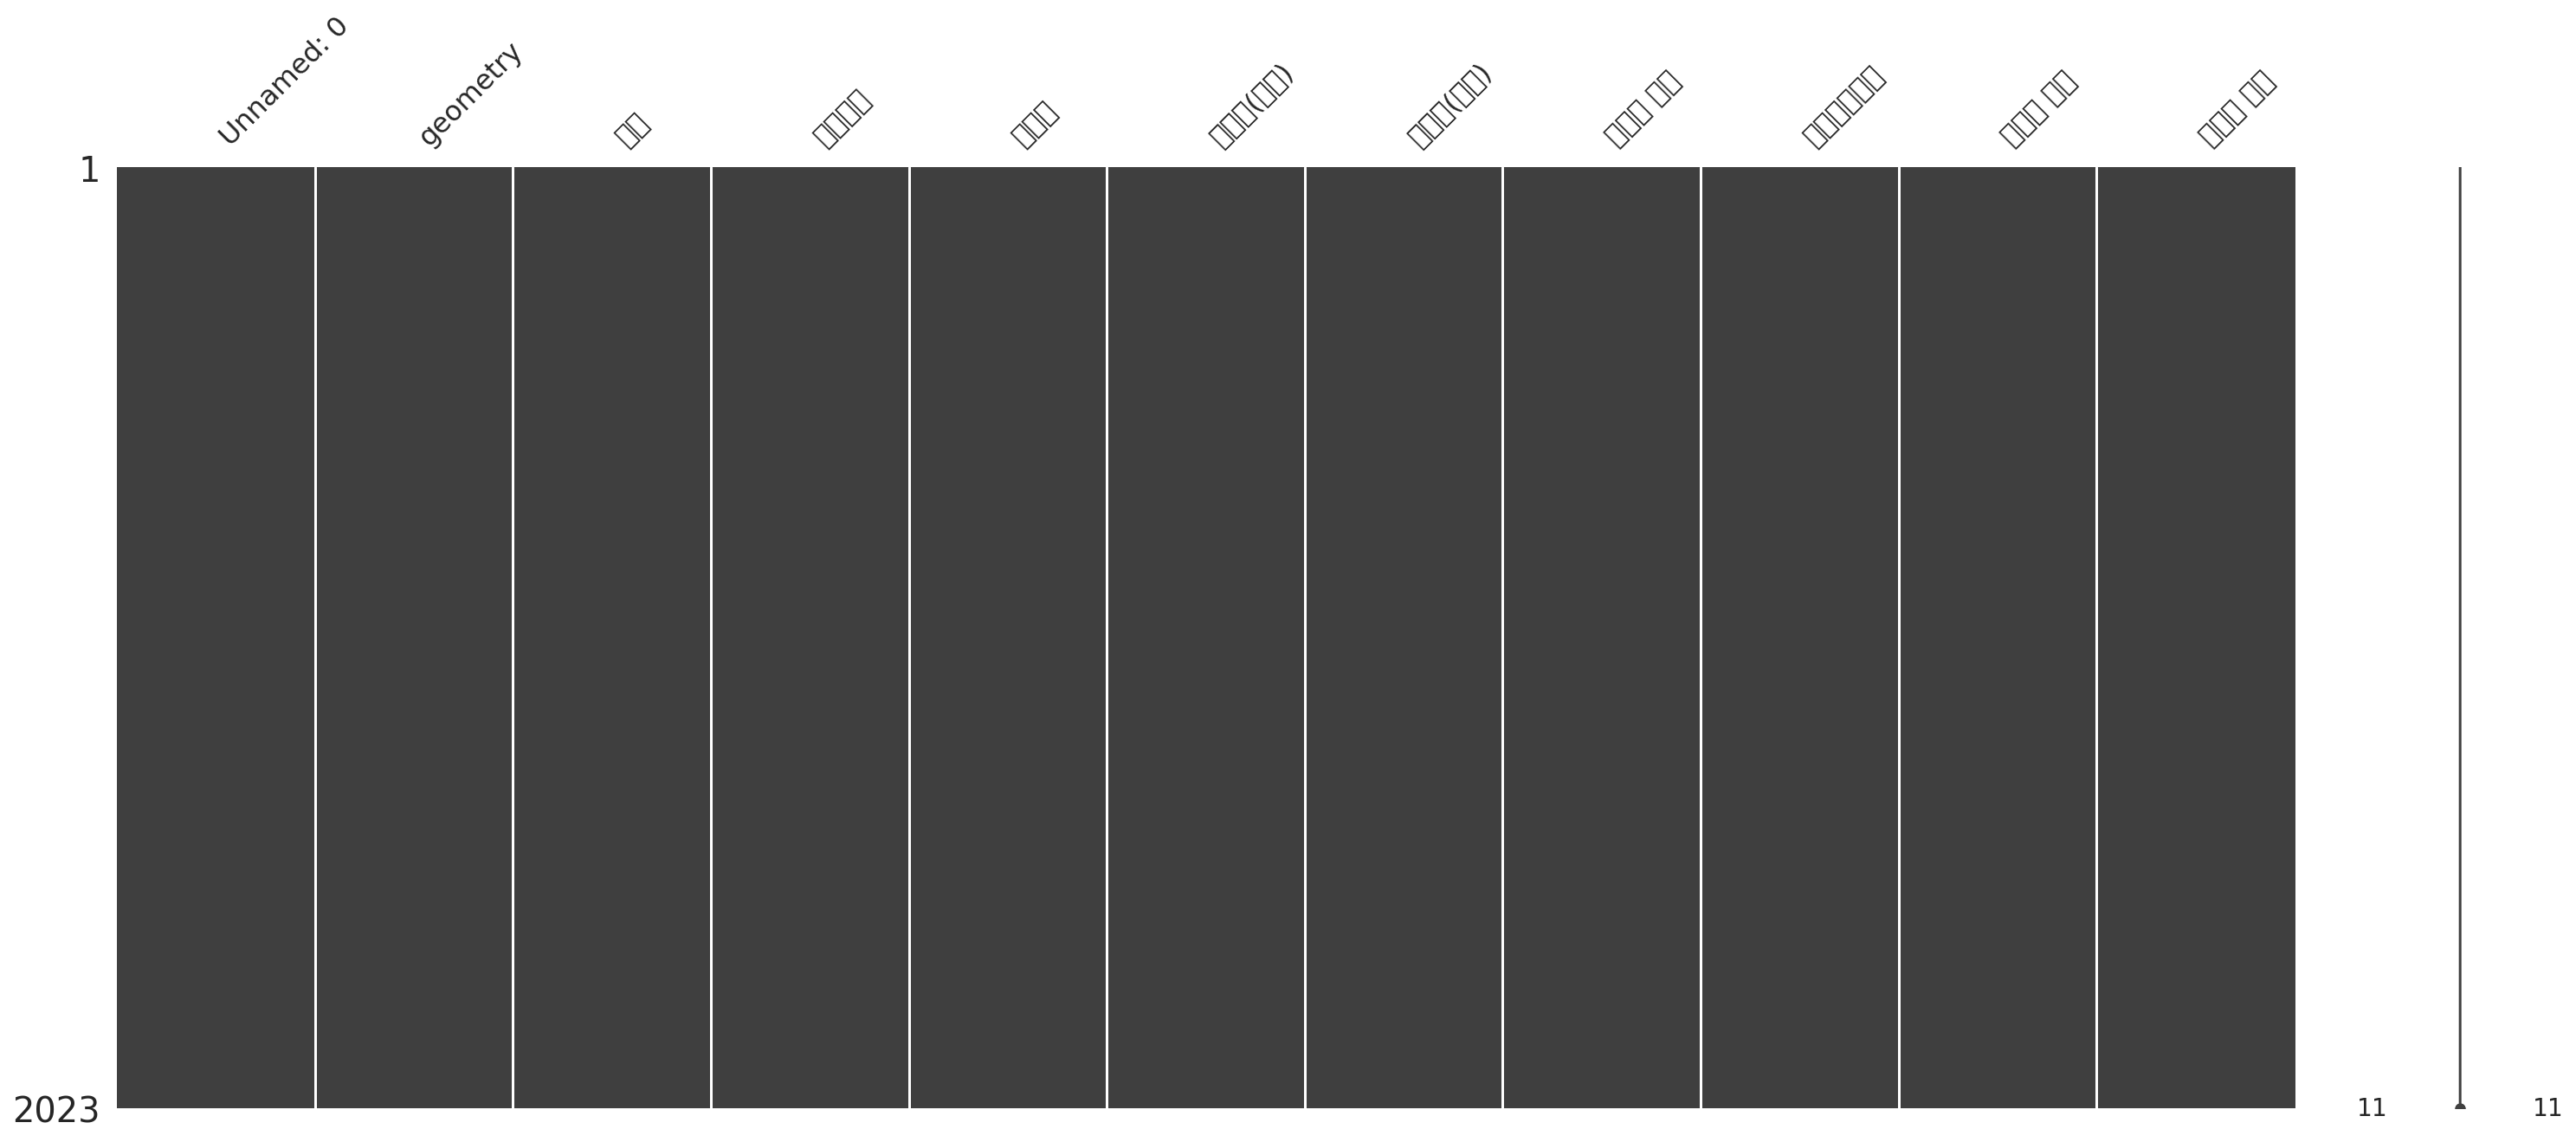

In [ ]:
import missingno as msno

msno.matrix(s_df)

#Target = 정류장 유무 지정



In [ ]:
S_target = s_df['정류장 유무']
s_df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,출발지도착지,정류장 개수,정류장 유무
0,0,MULTIPOLYGON (((127.31024156760803 36.47196453...,0.0,0.0,5.0,0.0,0.0,0.000000,0.0,0.0,0
1,1,MULTIPOLYGON (((127.28803984237655 36.42685092...,33.0,14.0,17.0,15.0,0.0,1.889858,0.0,0.0,0
2,2,MULTIPOLYGON (((127.24341702045801 36.42676337...,22.0,7.0,14.0,14.0,0.0,1.259905,0.0,0.0,0
3,3,MULTIPOLYGON (((127.20892029233768 36.70164351...,107.0,15.0,32.0,3.0,12.0,10.654835,0.0,0.0,0
4,4,MULTIPOLYGON (((127.24873316042621 36.50791159...,3096.0,182.0,45.0,7.0,27.0,66.289725,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2018,2018,MULTIPOLYGON (((127.1813225522552 36.606916239...,0.0,0.0,9.0,0.0,0.0,0.000000,0.0,0.0,0
2019,2019,MULTIPOLYGON (((127.27666444232909 36.50345957...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2020,2020,MULTIPOLYGON (((127.26016441946172 36.42229054...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2021,2021,MULTIPOLYGON (((127.29333061211061 36.53504260...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0


Test target 결과값 시각화

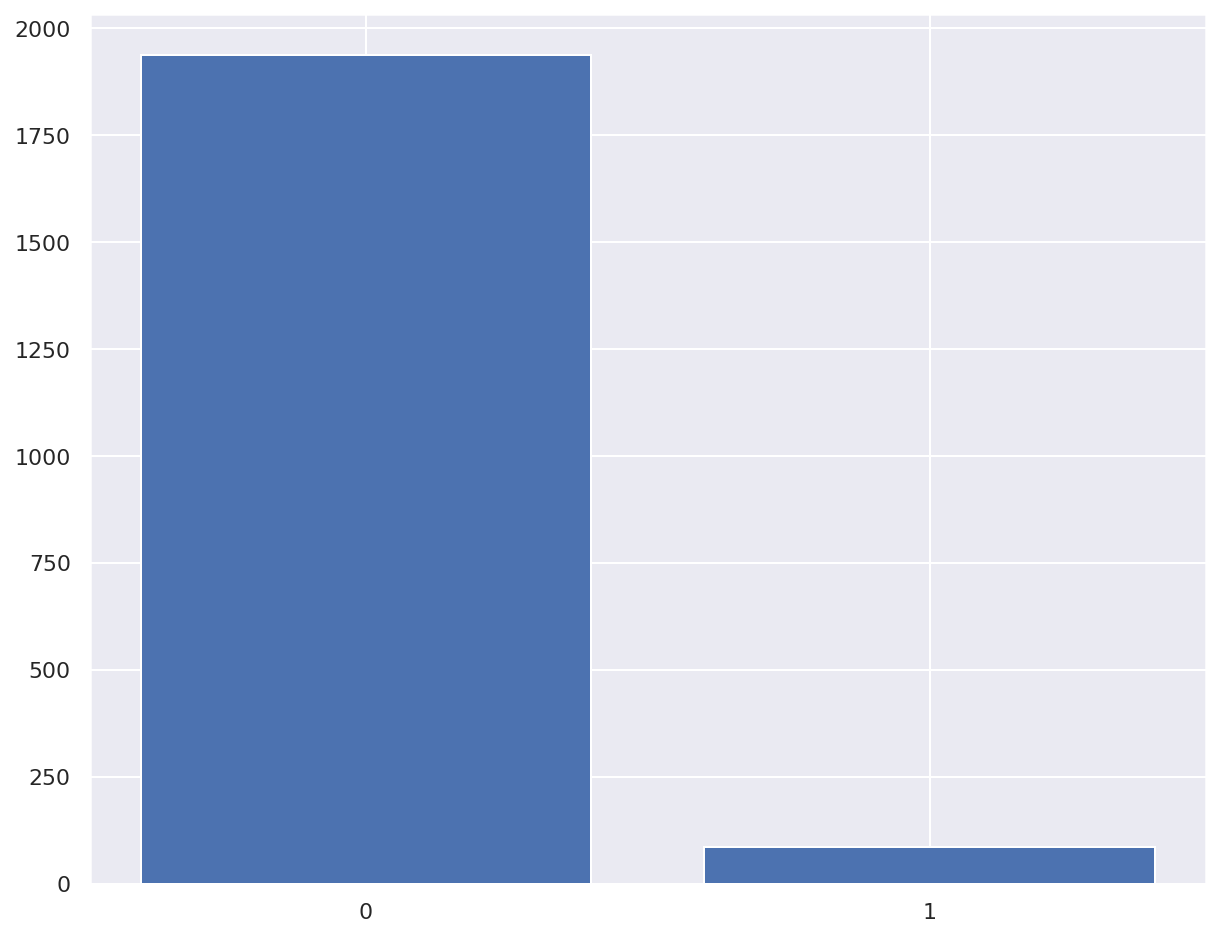

0    1937
1      86
Name: 정류장 유무, dtype: int64


In [ ]:
plt.bar(S_target.unique(), S_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(S_target.value_counts())

In [ ]:
s_df.columns

Index(['Unnamed: 0', 'geometry', '인구', '고령인구', '건물수', '건물수(단독)', '건물수(공동)',
       '장애인 인구', '출발지도착지', '정류장 개수', '정류장 유무'],
      dtype='object')

필요없는 column값 제거

In [ ]:
s_df = s_df.drop(['geometry'], axis=1)
s_df = s_df.drop(['Unnamed: 0'], axis=1)
s_df = s_df.drop(['정류장 유무'], axis =1)
s_df = s_df.drop(['정류장 개수'], axis =1)
s_df = s_df.drop(['출발지도착지'], axis =1)


s_df.head(5)

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.0,0.0,5.0,0.0,0.0,0.000000
1,33.0,14.0,17.0,15.0,0.0,1.889858
2,22.0,7.0,14.0,14.0,0.0,1.259905
3,107.0,15.0,32.0,3.0,12.0,10.654835
4,3096.0,182.0,45.0,7.0,27.0,66.289725


정규화(Feature Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s_df[:] = scaler.fit_transform(s_df[:])

In [ ]:
s_df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000
1,0.004079,0.016073,0.024638,0.047468,0.000000,0.005650
2,0.002719,0.008037,0.020290,0.044304,0.000000,0.003766
3,0.013225,0.017222,0.046377,0.009494,0.107143,0.031853
4,0.382647,0.208955,0.065217,0.022152,0.241071,0.198173
...,...,...,...,...,...,...
2018,0.000000,0.000000,0.013043,0.000000,0.000000,0.000000
2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data_test = s_df
target_test = S_target

SMOTE 적용

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=22)
data_train,target_train = smote.fit_resample(data_train,target_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', data_train.shape, target_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', data_train_over.shape, target_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(target_train_over).value_counts())

ValueError: ignored

In [ ]:
#나오는 방식 만들기
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)

    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

#DecisionTree Classifier

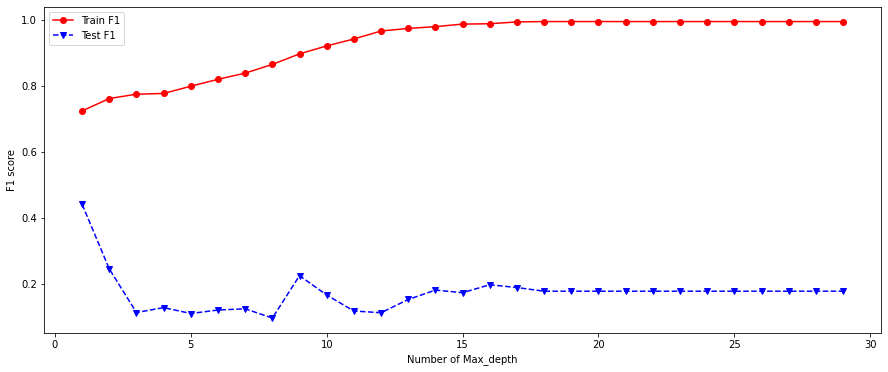

best testF1 : 0.44015444015444016


In [ ]:
numNeighbors = list(range(1, 30))
trainF1 = []  #아무것도 들어있지 않는 빈 리스트
testF1 = []
for k in numNeighbors:
    clf = DecisionTreeClassifier(max_depth=k, random_state=22)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain,average='micro'))
    testF1.append(f1_score(target_test, Y_predTest))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of Max_depth')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

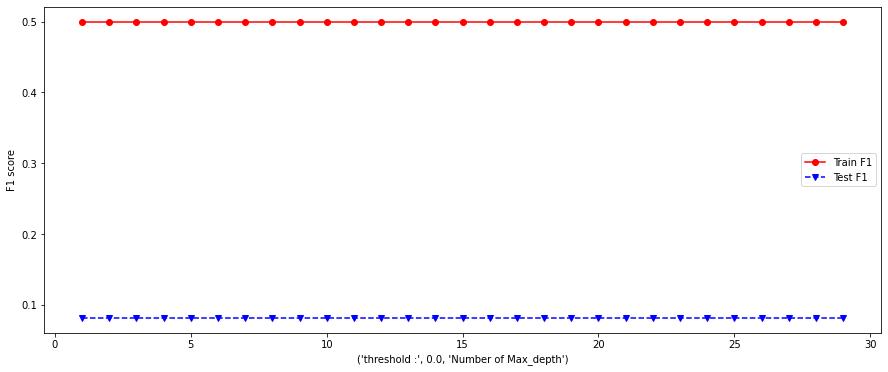

best testF1 : 0.0815552394499763


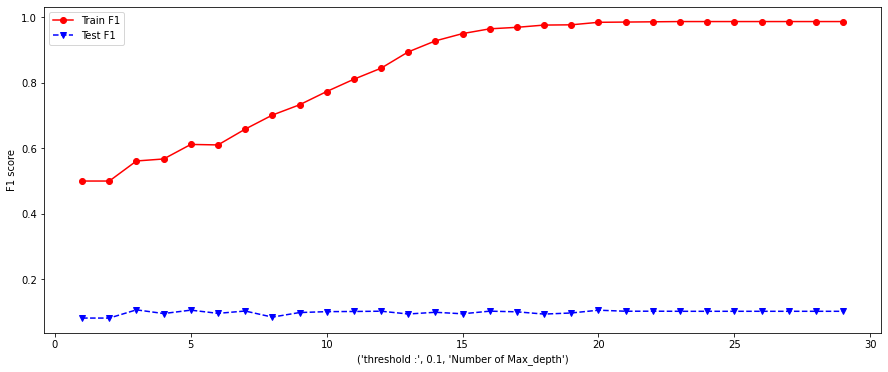

best testF1 : 0.10666666666666666


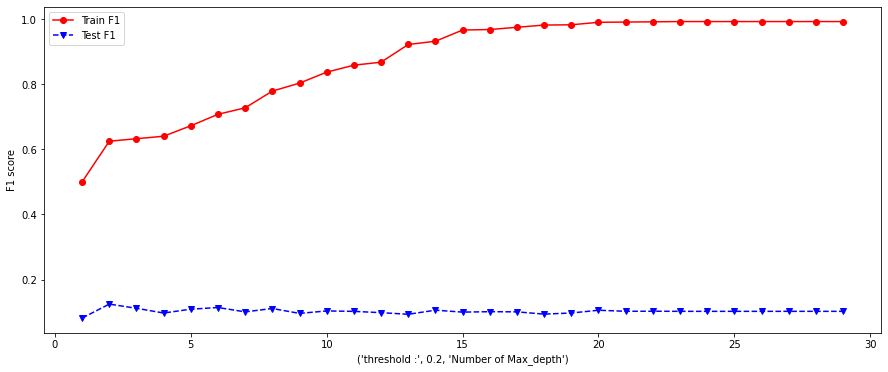

best testF1 : 0.12448132780082988


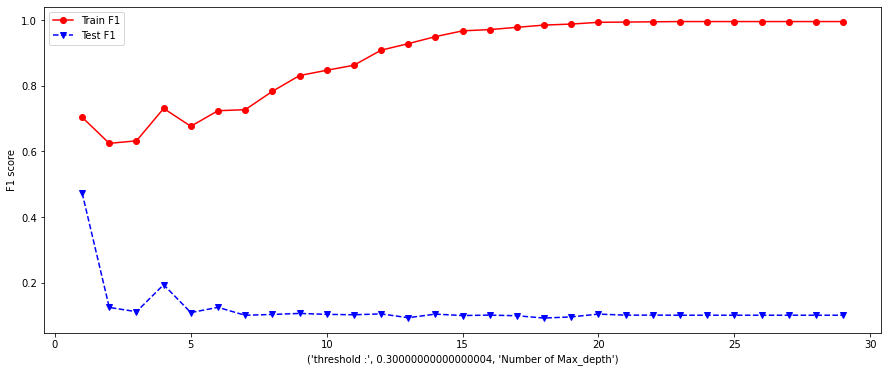

best testF1 : 0.4736842105263157


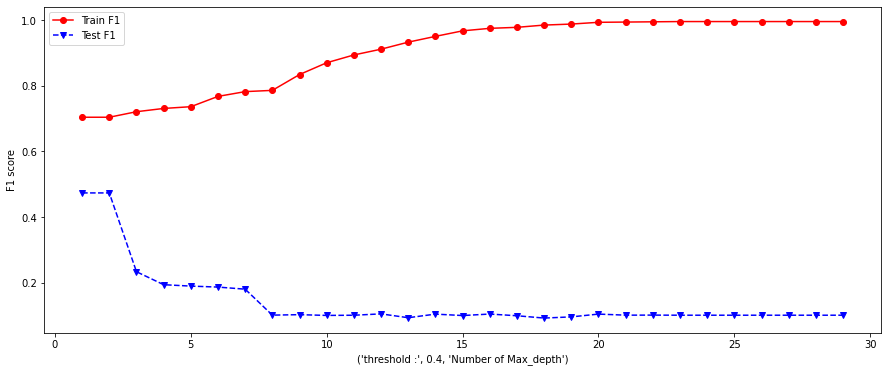

best testF1 : 0.4736842105263157


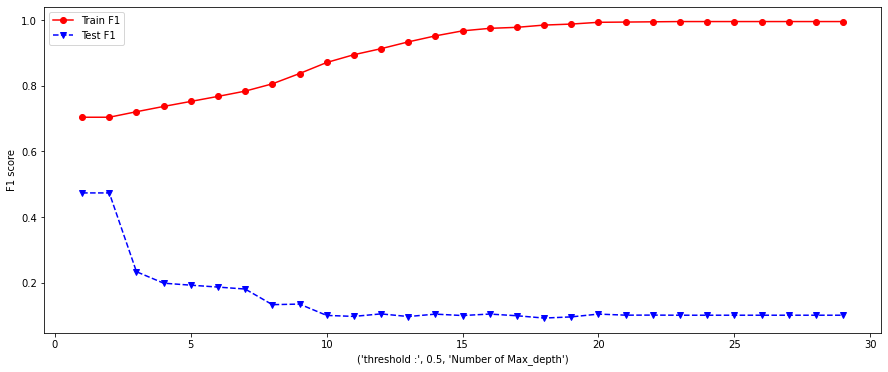

best testF1 : 0.4736842105263157


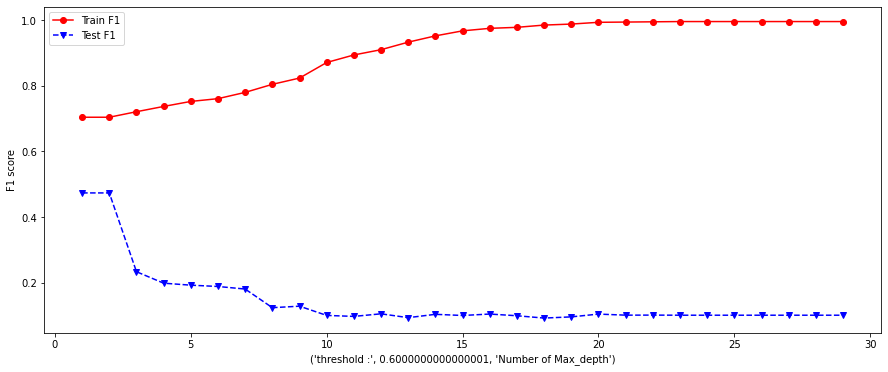

best testF1 : 0.4736842105263157


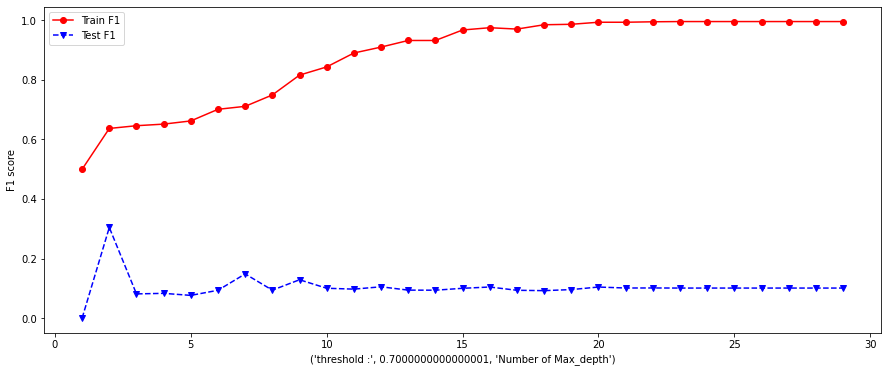

best testF1 : 0.3043478260869565


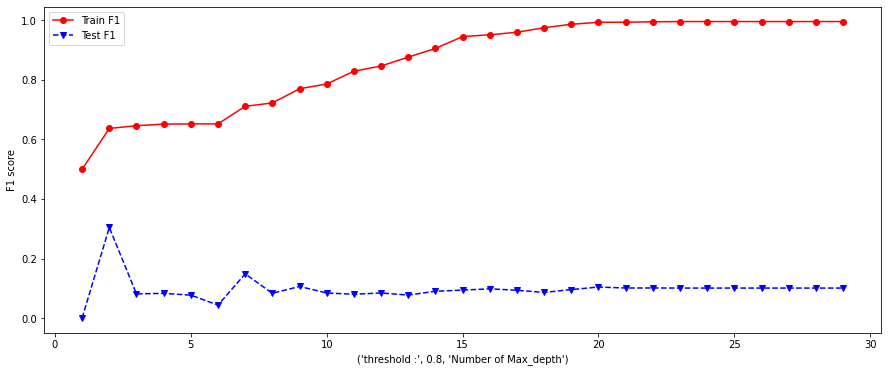

best testF1 : 0.3043478260869565


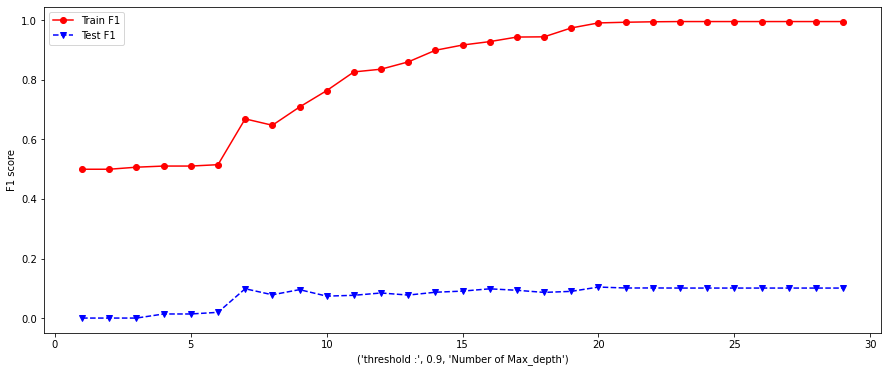

best testF1 : 0.10423452768729642


In [ ]:
#test
numNeighbors = list(range(1, 30))

thresholds = np.arange(0,1,0.1)

for threshold in thresholds:
  trainF1 = []  #아무것도 들어있지 않는 빈 리스트
  testF1 = []





  for k in numNeighbors:
      clf = DecisionTreeClassifier(max_depth=k, random_state=22)
      clf.fit(data_train_over, target_train_over)
      Y_predproba_train = clf.predict_proba(data_train_over)
      Y_predproba_test = clf.predict_proba(data_test)
      Y_predTrain = (Y_predproba_train [:,1] >= threshold).astype('int')
      Y_predTest = (Y_predproba_test [:,1] >= threshold).astype('int')
      trainF1.append(f1_score(target_train_over, Y_predTrain, average='micro'))
      testF1.append(f1_score(target_test, Y_predTest))
  plt.figure(figsize=(15, 6))
  plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
  plt.legend(['Train F1', 'Test F1'])
  xlabel = 'threshold :', threshold,'Number of Max_depth'
  plt.xlabel(xlabel)
  plt.ylabel('F1 score')
  plt.show()
  print("best testF1 :", max(testF1))

In [ ]:
s_df = data_test.copy()
s_df['정류장 유무']=target_test
s_df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 유무
0,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000,0
1,0.004079,0.016073,0.024638,0.047468,0.000000,0.005650,0
2,0.002719,0.008037,0.020290,0.044304,0.000000,0.003766,0
3,0.013225,0.017222,0.046377,0.009494,0.107143,0.031853,0
4,0.382647,0.208955,0.065217,0.022152,0.241071,0.198173,0
...,...,...,...,...,...,...,...
2018,0.000000,0.000000,0.013043,0.000000,0.000000,0.000000,0
2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [ ]:
s_df['0일확률'] = clf.predict_proba(data_test)[:,0]
s_df['1확률'] = clf.predict_proba(data_test)[:,1]

In [ ]:
s_df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 유무,0일확률,1확률
0,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000,0,0.000000,1.000000
1,0.004079,0.016073,0.024638,0.047468,0.000000,0.005650,0,1.000000,0.000000
2,0.002719,0.008037,0.020290,0.044304,0.000000,0.003766,0,1.000000,0.000000
3,0.013225,0.017222,0.046377,0.009494,0.107143,0.031853,0,1.000000,0.000000
4,0.382647,0.208955,0.065217,0.022152,0.241071,0.198173,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2018,0.000000,0.000000,0.013043,0.000000,0.000000,0.000000,0,1.000000,0.000000
2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.947368,0.052632
2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.947368,0.052632
2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.947368,0.052632


In [ ]:
max(testF1)

SyntaxError: ignored

In [ ]:
testF1.index(max(testF1))

0

In [ ]:
testF1.index(max(testF1))+1

1

In [ ]:
s_df_nonull = pd.read_csv('/content/500격자 세종시.csv',  encoding='UTF-8')
#df = pd.drop([pd.columns[0]], axis=1)
s_df_nonull.head(10)


,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,출발지도착지,정류장 개수,정류장 유무
0,0,MULTIPOLYGON (((127.31024156760803 36.47196453...,0.0,0.0,5.0,0.0,0.0,0.000000,0.0,0.0,0
1,1,MULTIPOLYGON (((127.28803984237655 36.42685092...,33.0,14.0,17.0,15.0,0.0,1.889858,0.0,0.0,0
2,2,MULTIPOLYGON (((127.24341702045801 36.42676337...,22.0,7.0,14.0,14.0,0.0,1.259905,0.0,0.0,0
3,3,MULTIPOLYGON (((127.20892029233768 36.70164351...,107.0,15.0,32.0,3.0,12.0,10.654835,0.0,0.0,0
4,4,MULTIPOLYGON (((127.24873316042621 36.50791159...,3096.0,182.0,45.0,7.0,27.0,66.289725,1.0,0.0,0
5,5,MULTIPOLYGON (((127.17000659132937 36.63843780...,0.0,0.0,3.0,1.0,0.0,0.000000,0.0,0.0,0
6,6,MULTIPOLYGON (((127.30464915420065 36.47646311...,1049.0,114.0,46.0,28.0,9.0,60.074562,0.0,0.0,0
7,7,MULTIPOLYGON (((127.32138309073517 36.48099693...,0.0,0.0,2.0,2.0,0.0,0.000000,0.0,0.0,0
8,8,MULTIPOLYGON (((127.39946957735398 36.52616416...,9.0,0.0,20.0,0.0,0.0,0.855057,0.0,0.0,0
9,9,MULTIPOLYGON (((127.29904445402386 36.48546900...,3429.0,184.0,74.0,0.0,34.0,74.809920,1.0,2.0,1


In [ ]:
import shapely.wkt
import geopandas
s_df_nonull['geometry'] = s_df_nonull['geometry'].astype('string')
P = []

for s in s_df_nonull['geometry']:
    P.append(shapely.wkt.loads(s))

s_df_nonull['geometry'] = P
s_df_nonull = geopandas.GeoDataFrame(s_df_nonull, geometry=P)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


실제 정류장이 있는 격자 수 : 86
정류장이 있어야 한다고 분류한 타일 수 : 180
recall score 실제 정류장이 맞는 지 맞춘 경우 : 63 / 86
precision score 실제 정류장이 없는 곳을 맞춘 경우 : 1820 / 1937
최적 입지 후보(실제론 없지만, 있어야 한다고 분류) : 117 / 1937


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


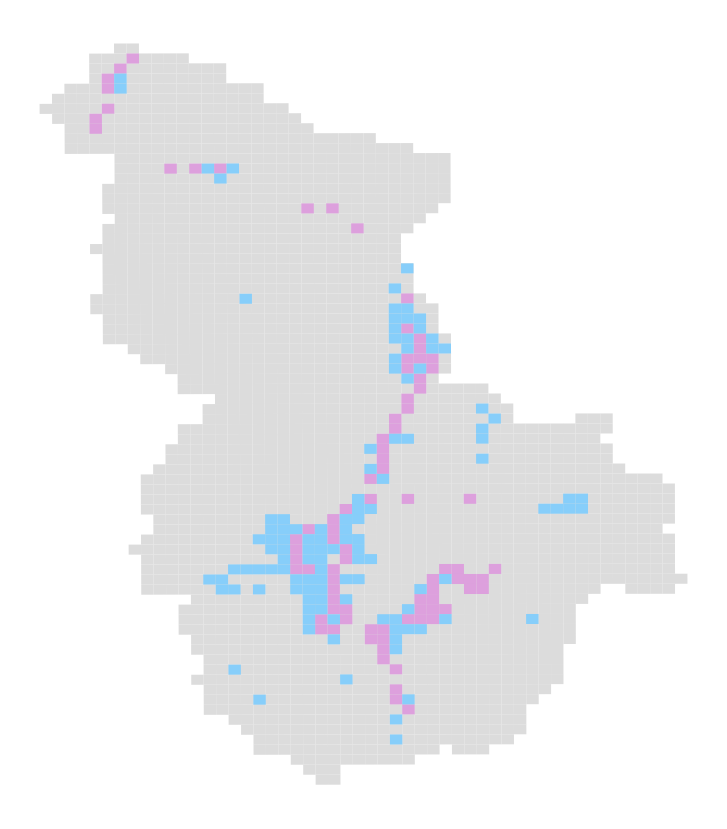

In [ ]:
# threshold, max_depth 값을 직접 넣음

clf = DecisionTreeClassifier(max_depth=1, random_state=22)
clf.fit(data_train_over, target_train_over)
Y_predproba_test = clf.predict_proba(data_test)
Y_predTest = (Y_predproba_test [:,1] >= 0.5).astype('int')

temp = s_df_nonull.copy()
temp['pred'] = [0]*len(temp)
for i, idx in enumerate(data_test.index):
    temp['pred'][idx] = Y_predTest[i]

print('실제 정류장이 있는 격자 수 :', len(temp[temp['정류장 유무']==1]))
print('정류장이 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
print('recall score 실제 정류장이 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['정류장 유무']==1)]), '/', len(temp[temp['정류장 유무']==1]))
print('precision score 실제 정류장이 없는 곳을 맞춘 경우 :', len(temp[(temp['pred']==0) & (temp['정류장 유무']==0)]), '/', len(temp[temp['정류장 유무']==0]))
print('최적 입지 후보(실제론 없지만, 있어야 한다고 분류) :', len(temp[(temp['pred']==1) & (temp['정류장 유무']==0)]), '/', len(temp[temp['정류장 유무']==0]))

# 정류장 유무 == 0 & predict == 1 인 경우만 ['pred']에서 1로 설정
idx = temp[(temp['정류장 유무'] == 0) & (temp['pred'] == 1)].index
for i in temp[temp['pred'] == 1].index:
    temp['pred'].loc[i] = 0
for i in idx:
    temp['pred'].loc[i] = 1

fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white')
s_df_nonull['geometry'].plot(ax=ax1, color='gainsboro')
s_df_nonull[s_df_nonull['정류장 유무']==1].plot(ax=ax1, column='정류장 유무', color='plum', aspect=1)
temp[temp['pred']==1].plot(ax=ax1, column='pred', color='lightskyblue', aspect=1)
ax1.set_axis_off()
plt.show()


In [ ]:
clf = DecisionTreeClassifier(max_depth=testF1.index(max(testF1))+1, random_state=22)
clf.fit(data_train, target_train)


print("RF 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("RF 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

RF 훈련 세트 정확도: 0.724
RF 테스트 세트 정확도: 0.894
오차 행렬
[[1162  116]
 [  29   57]]
정확도: 0.8937, 정밀도: 0.3295, 재현율: 0.6628, F1: 0.4402, AUC: 0.7860


In [ ]:
s_df[s_df['정류장 유무']==0].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363],
           dtype='int64', length=1278)

In [ ]:
#s_df['pred']=preds
#s_df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 유무,0일확률,1확률,pred
0,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000,0,0.800000,0.200000,0.0
1,0.004079,0.016073,0.024638,0.047468,0.000000,0.005650,0,1.000000,0.000000,0.0
2,0.002719,0.008037,0.020290,0.044304,0.000000,0.003766,0,0.000000,1.000000,0.0
3,0.013225,0.017222,0.046377,0.009494,0.107143,0.031853,0,1.000000,0.000000,0.0
4,0.382647,0.208955,0.065217,0.022152,0.241071,0.198173,0,1.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
1359,0.000000,0.000000,0.001449,0.000000,0.000000,0.000000,0,0.947368,0.052632,0.0
1360,0.000000,0.000000,0.005797,0.012658,0.000000,0.000000,0,1.000000,0.000000,0.0
1361,0.000000,0.000000,0.004348,0.000000,0.000000,0.000000,0,0.888889,0.111111,0.0
1362,0.000000,0.000000,0.013043,0.000000,0.000000,0.000000,0,1.000000,0.000000,0.0


In [ ]:
#s_df = s_df[(s_df['정류장 유무']==0)&(s_df['pred']==1)]

In [ ]:
s_df.index

Int64Index([   4,    6,   10,   19,   22,   47,   58,   74,   75,   82,
            ...
            1137, 1151, 1165, 1176, 1195, 1197, 1203, 1205, 1206, 1209],
           dtype='int64', length=116)

#KNN

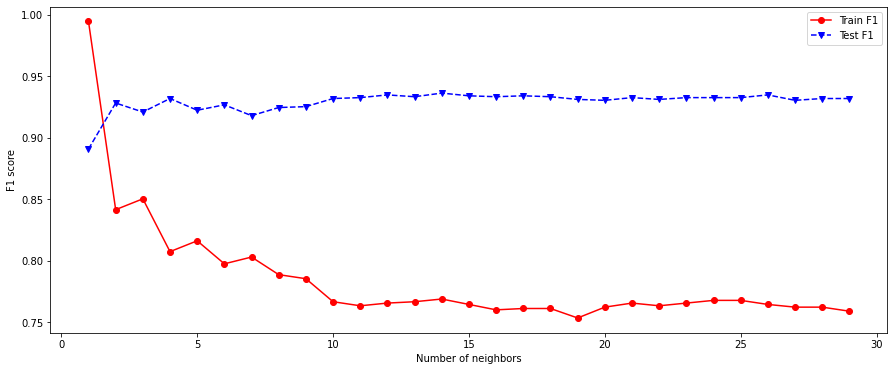

best testF1 : 0.9362170087976539


In [ ]:
import matplotlib.pyplot as plt

numNeighbors = list(range(1, 30))
trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [ ]:
print("RF 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("RF 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

RF 훈련 세트 정확도: 0.759
RF 테스트 세트 정확도: 0.932
오차 행렬
[[1243   35]
 [  58   28]]
정확도: 0.9318, 정밀도: 0.4444, 재현율: 0.3256, F1: 0.3758, AUC: 0.8051


#Ensemble

In [ ]:
from sklearn import ensemble

# trainAcc = []
# testAcc = []

# X_test, Y_test = data_test, target_test

#*RandomForest*

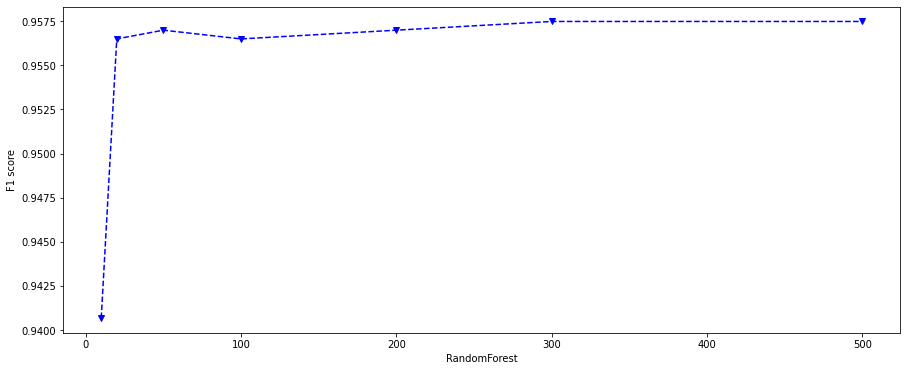

In [ ]:
n_estimator = [10, 20, 50, 100, 200, 300, 500]
testF1 = []
bestf1 = []

for k in n_estimator:
    clf = ensemble.RandomForestClassifier(n_estimators=k, random_state=22)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(n_estimator, testF1, 'bv--')
plt.xlabel('RandomForest')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
print("RF 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("RF 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

RF 훈련 세트 정확도: 0.994
RF 테스트 세트 정확도: 0.937
오차 행렬
[[1262   16]
 [  70   16]]
정확도: 0.9370, 정밀도: 0.5000, 재현율: 0.1860, F1: 0.2712, AUC: 0.7731


#Bagging

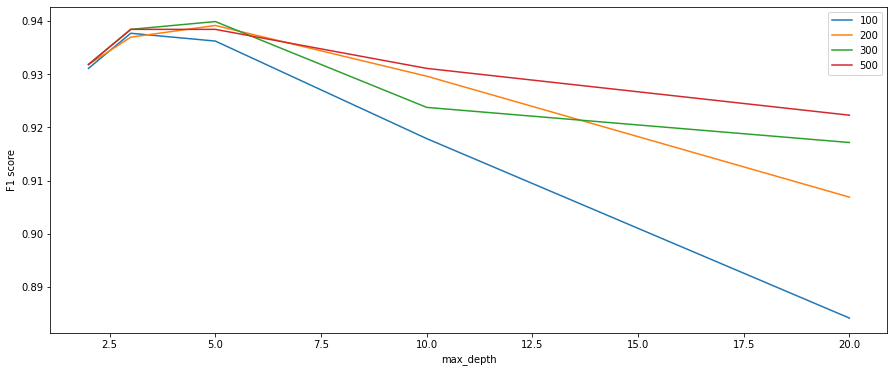

In [ ]:
numBaseClassifiers = [100, 200, 300, 500]
max_depths = [2, 3, 5, 10, 20]
F1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k, random_state=22)
        clf.fit(data_train, target_train)
        Y_predTrain = clf.predict(data_train)
        Y_predTest = clf.predict(data_test)
        F1.append(f1_score(target_test, Y_predTest, average='micro'))
    plt.plot(max_depths, F1)
    testF1.append(max(F1))
    F1 = []

plt.legend(numBaseClassifiers)
plt.xlabel('max_depth')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
Y_predTest

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print("Bagging 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("Bagging 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

Bagging 훈련 세트 정확도: 0.994
Bagging 테스트 세트 정확도: 0.922
오차 행렬
[[1243   35]
 [  71   15]]
정확도: 0.9223, 정밀도: 0.3000, 재현율: 0.1744, F1: 0.2206, AUC: 0.6902


#Adaboost

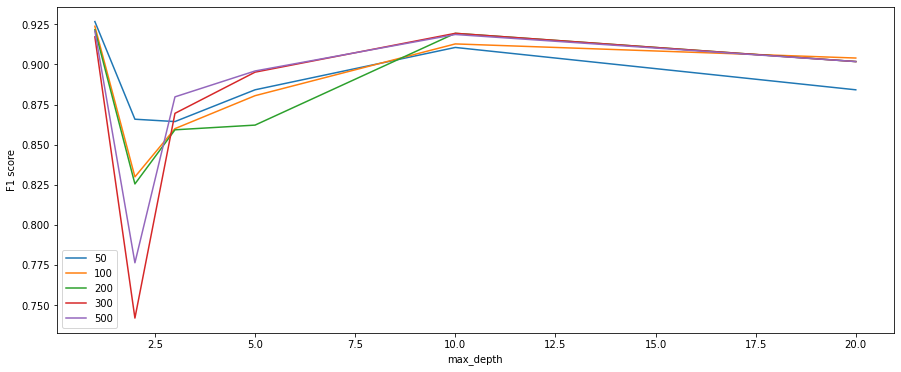

In [ ]:
numBaseClassifiers = [50, 100, 200, 300, 500]
max_depths = [1, 2, 3, 5, 10, 20]
F1 = []
testF1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k, random_state=22)
        clf.fit(data_train, target_train)
        Y_predTrain = clf.predict(data_train)
        Y_predTest = clf.predict(data_test)
        F1.append(f1_score(target_test, Y_predTest, average='micro'))

    plt.plot(max_depths, F1)
    testF1.append(max(F1))
    F1 = []

plt.legend(numBaseClassifiers)
plt.xlabel('max_depth')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
print("AdaBoost 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("AdaBoost 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)


AdaBoost 훈련 세트 정확도: 0.994
AdaBoost 테스트 세트 정확도: 0.902
오차 행렬
[[1212   66]
 [  68   18]]
정확도: 0.9018, 정밀도: 0.2143, 재현율: 0.2093, F1: 0.2118, AUC: 0.6332


임계치설정

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=testF1.index(max(testF1))+1, random_state=22)
knn_clf =  KNeighborsClassifier(n_neighbors=k, metric='minkowski')
rf_clf = ensemble.RandomForestClassifier(n_estimators=k, random_state=22)
bag_clf =ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k, random_state=22)
ada_clf =  ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k, random_state=22)

model_all = [dt_clf
             , knn_clf, rf_clf, bag_clf, ada_clf]
lr_final = LogisticRegression()


In [ ]:
for x in model_all:
    x.fit(data_train, target_train)

In [ ]:
thresholds = np.arange(0,1,0.1)

f1 = []

for x in model_all:
    print(x)
    pred_proba=x.predict_proba(np.array(data_test))
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        print('threshold : ', threshold)
        print('오차 행렬')
        confusion = confusion_matrix(target_test, model_cl_pred)
        print(confusion)
        print('accuracy : ', accuracy_score(target_test,model_cl_pred))
        print('precision : ', precision_score(target_test,model_cl_pred))
        print('recall : ', recall_score(target_test,model_cl_pred))
        print('f1_score : ', f1_score(target_test,model_cl_pred))
        f1.append( f1_score(target_test,model_cl_pred))

        print('')
    print('===================================================')
    print('')

DecisionTreeClassifier(max_depth=1, random_state=22)
threshold :  0.0
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.1
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.2
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.8936950146627566
precision :  0.32947976878612717
recall :  0.6627906976744186
f1_score :  0.44015444015444016

threshold :  0.30000000000000004
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.8936950146627566
precision :  0.32947976878612717
recall :  0.6627906976744186
f1_score :  0.44015444015444016

threshold :  0.4
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.8936950146627566
precision :  0.32947976878612717
recall :  0.6627906976744186
f1_score :  0.44015444015444016

threshold :  0.5
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.893695014662756

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

threshold :  0.0
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.1
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.2
오차 행렬
[[1199   79]
 [  37   49]]
accuracy :  0.9149560117302052
precision :  0.3828125
recall :  0.5697674418604651
f1_score :  0.45794392523364486

threshold :  0.30000000000000004
오차 행렬
[[1237   41]
 [  53   33]]
accuracy :  0.9310850439882697
precision :  0.44594594594594594
recall :  0.38372093023255816
f1_score :  0.4125

threshold :  0.4
오차 행렬
[[1272    6]
 [  80    6]]
accuracy :  0.9369501466275659
precision :  0.5
recall :  0.06976744186046512
f1_score :  0.12244897959183673

threshold :  0.5
오차 행렬
[[1278    0]
 [  86    0]]
accuracy :  0.9369501466275659
precision :  0.0
recall :  0.0
f1_score :  0.0

threshold :  0.6000000000000001
오차 행렬
[[

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

threshold :  0.0
오차 행렬
[[   5 1273]
 [   0   86]]
accuracy :  0.06671554252199413
precision :  0.06328182487122884
recall :  1.0
f1_score :  0.1190311418685121

threshold :  0.1
오차 행렬
[[306 972]
 [ 11  75]]
accuracy :  0.2793255131964809
precision :  0.07163323782234957
recall :  0.872093023255814
f1_score :  0.13239187996469548

threshold :  0.2
오차 행렬
[[743 535]
 [ 19  67]]
accuracy :  0.593841642228739
precision :  0.11129568106312292
recall :  0.7790697674418605
f1_score :  0.1947674418604651

threshold :  0.30000000000000004
오차 행렬
[[1013  265]
 [  27   59]]
accuracy :  0.7859237536656891
precision :  0.18209876543209877
recall :  0.686046511627907
f1_score :  0.28780487804878047

threshold :  0.4
오차 행렬
[[1214   64]
 [  49   37]]
accuracy :  0.9171554252199413
precision :  0.36633663366336633
recall :  0.43023255813953487
f1_score :  0.39572192513368987

threshold :  0.5
오차 행렬
[[1262   16]
 [  70   16]]
accuracy :  0.9369501466275659
precision :  0.5
recall :  0.18604651162790697
f1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"


threshold :  0.0
오차 행렬
[[   5 1273]
 [   0   86]]
accuracy :  0.06671554252199413
precision :  0.06328182487122884
recall :  1.0
f1_score :  0.1190311418685121

threshold :  0.1
오차 행렬
[[ 235 1043]
 [  10   76]]
accuracy :  0.2280058651026393
precision :  0.0679177837354781
recall :  0.8837209302325582
f1_score :  0.12614107883817427

threshold :  0.2
오차 행렬
[[602 676]
 [ 19  67]]
accuracy :  0.4904692082111437
precision :  0.0901749663526245
recall :  0.7790697674418605
f1_score :  0.16164053075995174

threshold :  0.30000000000000004
오차 행렬
[[877 401]
 [ 29  57]]
accuracy :  0.6847507331378299
precision :  0.12445414847161572
recall :  0.6627906976744186
f1_score :  0.20955882352941177

threshold :  0.4
오차 행렬
[[1077  201]
 [  54   32]]
accuracy :  0.8130498533724341
precision :  0.13733905579399142
recall :  0.37209302325581395
f1_score :  0.2006269592476489

threshold :  0.5
오차 행렬
[[1243   35]
 [  71   15]]
accuracy :  0.9222873900293255
precision :  0.3
recall :  0.1744186046511628
f1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


threshold :  0.0
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.1
오차 행렬
[[ 143 1135]
 [   2   84]]
accuracy :  0.16642228739002932
precision :  0.06890894175553733
recall :  0.9767441860465116
f1_score :  0.12873563218390804

threshold :  0.2
오차 행렬
[[390 888]
 [  9  77]]
accuracy :  0.34237536656891493
precision :  0.07979274611398963
recall :  0.8953488372093024
f1_score :  0.14652711703139865

threshold :  0.30000000000000004
오차 행렬
[[688 590]
 [ 33  53]]
accuracy :  0.5432551319648093
precision :  0.08242612752721618
recall :  0.6162790697674418
f1_score :  0.14540466392318244

threshold :  0.4
오차 행렬
[[922 356]
 [ 51  35]]
accuracy :  0.7016129032258065
precision :  0.08951406649616368
recall :  0.4069767441860465
f1_score :  0.14675052410901468

threshold :  0.5
오차 행렬
[[1212   66]
 [  68   18]]
accuracy :  0.9017595307917888
precision :  0.21428571428571427
recall :  0.20

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
max_threshold = max(f1)
max(f1)

0.45794392523364486

In [ ]:
thresholds = np.arange(0,1,0.1)

for x in model_all:
    print(x)
    pred_proba=x.predict_proba(np.array(data_test))
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        print('threshold : ', threshold)
        print('오차 행렬')
        confusion = confusion_matrix(target_test,model_cl_pred)
        print(confusion)
        print('accuracy : ', accuracy_score(target_test,model_cl_pred))
        print('precision : ', precision_score(target_test,model_cl_pred))
        print('recall : ', recall_score(target_test,model_cl_pred))
        print('f1_score : ', f1_score(target_test,model_cl_pred))
        print('')
    print('===================================================')
    print('')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier(max_depth=1, random_state=22)
threshold :  0.0
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.1
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.2
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.8936950146627566
precision :  0.32947976878612717
recall :  0.6627906976744186
f1_score :  0.44015444015444016

threshold :  0.30000000000000004
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.8936950146627566
precision :  0.32947976878612717
recall :  0.6627906976744186
f1_score :  0.44015444015444016

threshold :  0.4
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.8936950146627566
precision :  0.32947976878612717
recall :  0.6627906976744186
f1_score :  0.44015444015444016

threshold :  0.5
오차 행렬
[[1162  116]
 [  29   57]]
accuracy :  0.893695014662756

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassi

threshold :  0.0
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.1
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.2
오차 행렬
[[1199   79]
 [  37   49]]
accuracy :  0.9149560117302052
precision :  0.3828125
recall :  0.5697674418604651
f1_score :  0.45794392523364486

threshold :  0.30000000000000004
오차 행렬
[[1237   41]
 [  53   33]]
accuracy :  0.9310850439882697
precision :  0.44594594594594594
recall :  0.38372093023255816
f1_score :  0.4125

threshold :  0.4
오차 행렬
[[1272    6]
 [  80    6]]
accuracy :  0.9369501466275659
precision :  0.5
recall :  0.06976744186046512
f1_score :  0.12244897959183673

threshold :  0.5
오차 행렬
[[1278    0]
 [  86    0]]
accuracy :  0.9369501466275659
precision :  0.0
recall :  0.0
f1_score :  0.0

threshold :  0.6000000000000001
오차 행렬
[[

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

threshold :  0.0
오차 행렬
[[   5 1273]
 [   0   86]]
accuracy :  0.06671554252199413
precision :  0.06328182487122884
recall :  1.0
f1_score :  0.1190311418685121

threshold :  0.1
오차 행렬
[[306 972]
 [ 11  75]]
accuracy :  0.2793255131964809
precision :  0.07163323782234957
recall :  0.872093023255814
f1_score :  0.13239187996469548

threshold :  0.2
오차 행렬
[[743 535]
 [ 19  67]]
accuracy :  0.593841642228739
precision :  0.11129568106312292
recall :  0.7790697674418605
f1_score :  0.1947674418604651

threshold :  0.30000000000000004
오차 행렬
[[1013  265]
 [  27   59]]
accuracy :  0.7859237536656891
precision :  0.18209876543209877
recall :  0.686046511627907
f1_score :  0.28780487804878047

threshold :  0.4
오차 행렬
[[1214   64]
 [  49   37]]
accuracy :  0.9171554252199413
precision :  0.36633663366336633
recall :  0.43023255813953487
f1_score :  0.39572192513368987

threshold :  0.5
오차 행렬
[[1262   16]
 [  70   16]]
accuracy :  0.9369501466275659
precision :  0.5
recall :  0.18604651162790697
f1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"


threshold :  0.0
오차 행렬
[[   5 1273]
 [   0   86]]
accuracy :  0.06671554252199413
precision :  0.06328182487122884
recall :  1.0
f1_score :  0.1190311418685121

threshold :  0.1
오차 행렬
[[ 235 1043]
 [  10   76]]
accuracy :  0.2280058651026393
precision :  0.0679177837354781
recall :  0.8837209302325582
f1_score :  0.12614107883817427

threshold :  0.2
오차 행렬
[[602 676]
 [ 19  67]]
accuracy :  0.4904692082111437
precision :  0.0901749663526245
recall :  0.7790697674418605
f1_score :  0.16164053075995174

threshold :  0.30000000000000004
오차 행렬
[[877 401]
 [ 29  57]]
accuracy :  0.6847507331378299
precision :  0.12445414847161572
recall :  0.6627906976744186
f1_score :  0.20955882352941177

threshold :  0.4
오차 행렬
[[1077  201]
 [  54   32]]
accuracy :  0.8130498533724341
precision :  0.13733905579399142
recall :  0.37209302325581395
f1_score :  0.2006269592476489

threshold :  0.5
오차 행렬
[[1243   35]
 [  71   15]]
accuracy :  0.9222873900293255
precision :  0.3
recall :  0.1744186046511628
f1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


threshold :  0.0
오차 행렬
[[   0 1278]
 [   0   86]]
accuracy :  0.06304985337243402
precision :  0.06304985337243402
recall :  1.0
f1_score :  0.11862068965517242

threshold :  0.1
오차 행렬
[[ 143 1135]
 [   2   84]]
accuracy :  0.16642228739002932
precision :  0.06890894175553733
recall :  0.9767441860465116
f1_score :  0.12873563218390804

threshold :  0.2
오차 행렬
[[390 888]
 [  9  77]]
accuracy :  0.34237536656891493
precision :  0.07979274611398963
recall :  0.8953488372093024
f1_score :  0.14652711703139865

threshold :  0.30000000000000004
오차 행렬
[[688 590]
 [ 33  53]]
accuracy :  0.5432551319648093
precision :  0.08242612752721618
recall :  0.6162790697674418
f1_score :  0.14540466392318244

threshold :  0.4
오차 행렬
[[922 356]
 [ 51  35]]
accuracy :  0.7016129032258065
precision :  0.08951406649616368
recall :  0.4069767441860465
f1_score :  0.14675052410901468

threshold :  0.5
오차 행렬
[[1212   66]
 [  68   18]]
accuracy :  0.9017595307917888
precision :  0.21428571428571427
recall :  0.20

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
